### Importing the necessary Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Reading the Manually Extracted Dataset from SEC's EDGAR's database
### <a href>https://www.sec.gov/edgar/searchedgar/cik</a>

In [2]:
data = pd.read_csv('Manually_extract.csv')

In [3]:
data

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company
0,2023,211915,72361,411976,205753,87582,Microsoft
1,2022,198270,72738,364840,198298,89035,Microsoft
2,2021,168088,61271,333779,191791,76740,Microsoft
3,2023,96773,14974,106618,43009,13256,Tesla
4,2022,81462,12556,82338,36440,14724,Tesla
5,2021,53821,5519,62131,30548,11497,Tesla
6,2023,383285,96995,352583,290437,110543,Apple
7,2022,394328,99803,352755,302083,122151,Apple
8,2021,365817,94680,351002,287912,104038,Apple


### Calculating Year-by-Year growth rates for Total Revenue and Net Income

In [4]:
data['Revenue Growth (%)'] = data.groupby('Company')['Total Revenue'].pct_change() * 100
data['Net Income Growth (%)'] = data.groupby('Company')['Net Income'].pct_change() * 100

In [5]:
data

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company,Revenue Growth (%),Net Income Growth (%)
0,2023,211915,72361,411976,205753,87582,Microsoft,NaN,NaN
1,2022,198270,72738,364840,198298,89035,Microsoft,-6.438902,0.520999
2,2021,168088,61271,333779,191791,76740,Microsoft,-15.222676,-15.764800
3,2023,96773,14974,106618,43009,13256,Tesla,NaN,NaN
4,2022,81462,12556,82338,36440,14724,Tesla,-15.821562,-16.147990
5,2021,53821,5519,62131,30548,11497,Tesla,-33.931158,-56.044919
6,2023,383285,96995,352583,290437,110543,Apple,NaN,NaN
7,2022,394328,99803,352755,302083,122151,Apple,2.881146,2.894995
8,2021,365817,94680,351002,287912,104038,Apple,-7.230275,-5.133112


### Imputing Null/NaN values that result from pct_change calculations with 0 

In [6]:
data.fillna(0, inplace=True)

In [7]:
data

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company,Revenue Growth (%),Net Income Growth (%)
0,2023,211915,72361,411976,205753,87582,Microsoft,0.000000,0.000000
1,2022,198270,72738,364840,198298,89035,Microsoft,-6.438902,0.520999
2,2021,168088,61271,333779,191791,76740,Microsoft,-15.222676,-15.764800
3,2023,96773,14974,106618,43009,13256,Tesla,0.000000,0.000000
4,2022,81462,12556,82338,36440,14724,Tesla,-15.821562,-16.147990
5,2021,53821,5519,62131,30548,11497,Tesla,-33.931158,-56.044919
6,2023,383285,96995,352583,290437,110543,Apple,0.000000,0.000000
7,2022,394328,99803,352755,302083,122151,Apple,2.881146,2.894995
8,2021,365817,94680,351002,287912,104038,Apple,-7.230275,-5.133112


### Approach 1

In [43]:
# Calculate year-over-year changes
# Calculate year-over-year changes for each financial metric, including 2023
data['Revenue Growth (%)'] = data.groupby('Company')['Total Revenue'].pct_change(periods=1) * 100
data['Net Income Growth (%)'] = data.groupby('Company')['Net Income'].pct_change(periods=1) * 100
data['Total Assets Growth (%)'] = data.groupby('Company')['Total Assets'].pct_change(periods=1) * 100
data['Total Liabilities Growth (%)'] = data.groupby('Company')['Total Liabilities'].pct_change(periods=1) * 100
data['Cash Flow Growth (%)'] = data.groupby('Company')['Cash Flow from Operating Activities'].pct_change(periods=1) * 100


# Display the results
print(data[['Company', 'Year', 'Revenue Growth (%)', 'Net Income Growth (%)', 'Total Assets Growth (%)', 'Total Liabilities Growth (%)', 'Cash Flow Growth (%)']])

     Company  Year  Revenue Growth (%)  Net Income Growth (%)  \
0  Microsoft  2023                 NaN                    NaN   
1  Microsoft  2022           -6.438902               0.520999   
2  Microsoft  2021          -15.222676             -15.764800   
3      Tesla  2023                 NaN                    NaN   
4      Tesla  2022          -15.821562             -16.147990   
5      Tesla  2021          -33.931158             -56.044919   
6      Apple  2023                 NaN                    NaN   
7      Apple  2022            2.881146               2.894995   
8      Apple  2021           -7.230275              -5.133112   

   Total Assets Growth (%)  Total Liabilities Growth (%)  Cash Flow Growth (%)  
0                      NaN                           NaN                   NaN  
1               -11.441443                     -3.623276              1.659017  
2                -8.513595                     -3.281425            -13.809176  
3                      Na

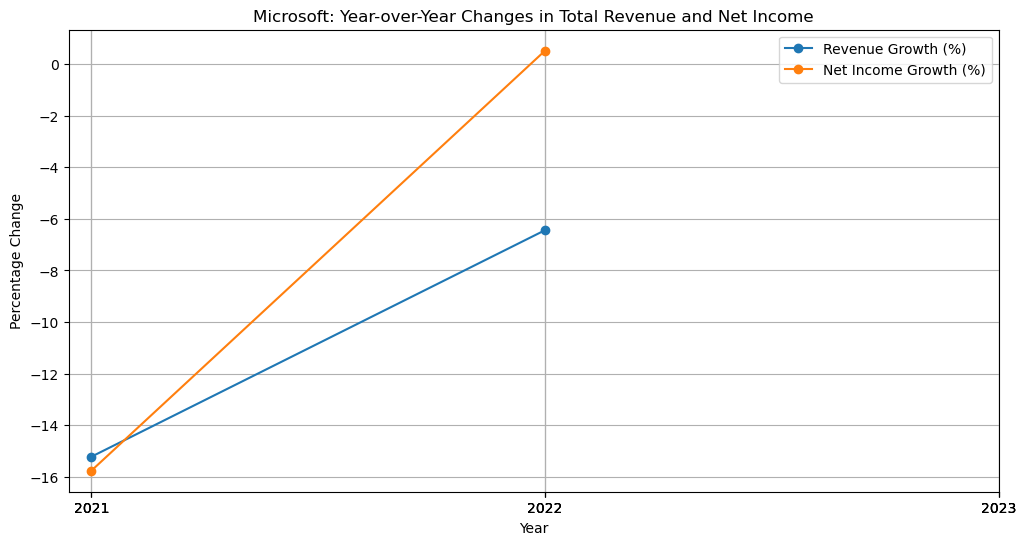

In [44]:
microsoft_df = data[data['Company'] == 'Microsoft']

# Plotting the year-over-year changes for Total Revenue and Net Income
plt.figure(figsize=(12, 6))
plt.plot(microsoft_df['Year'], microsoft_df['Revenue Growth (%)'], marker='o', label='Revenue Growth (%)')
plt.plot(microsoft_df['Year'], microsoft_df['Net Income Growth (%)'], marker='o', label='Net Income Growth (%)')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Microsoft: Year-over-Year Changes in Total Revenue and Net Income')
plt.legend()
plt.grid(True)
plt.xticks(data['Year'])
plt.show()

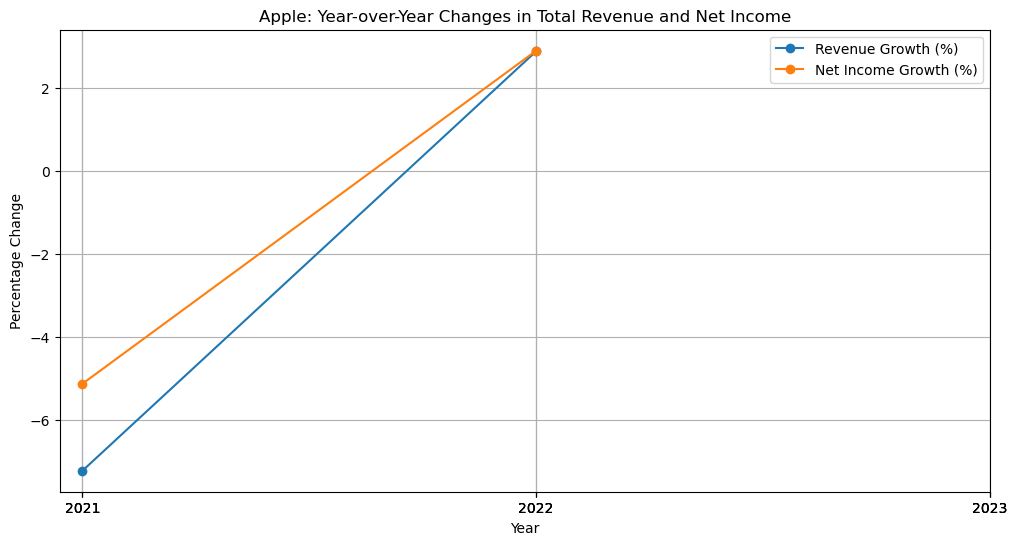

In [45]:
apple_df = data[data['Company'] == 'Apple']

# Plotting the year-over-year changes for Total Revenue and Net Income
plt.figure(figsize=(12, 6))
plt.plot(apple_df['Year'], apple_df['Revenue Growth (%)'], marker='o', label='Revenue Growth (%)')
plt.plot(apple_df['Year'], apple_df['Net Income Growth (%)'], marker='o', label='Net Income Growth (%)')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Apple: Year-over-Year Changes in Total Revenue and Net Income')
plt.legend()
plt.grid(True)
plt.xticks(data['Year'])
plt.show()

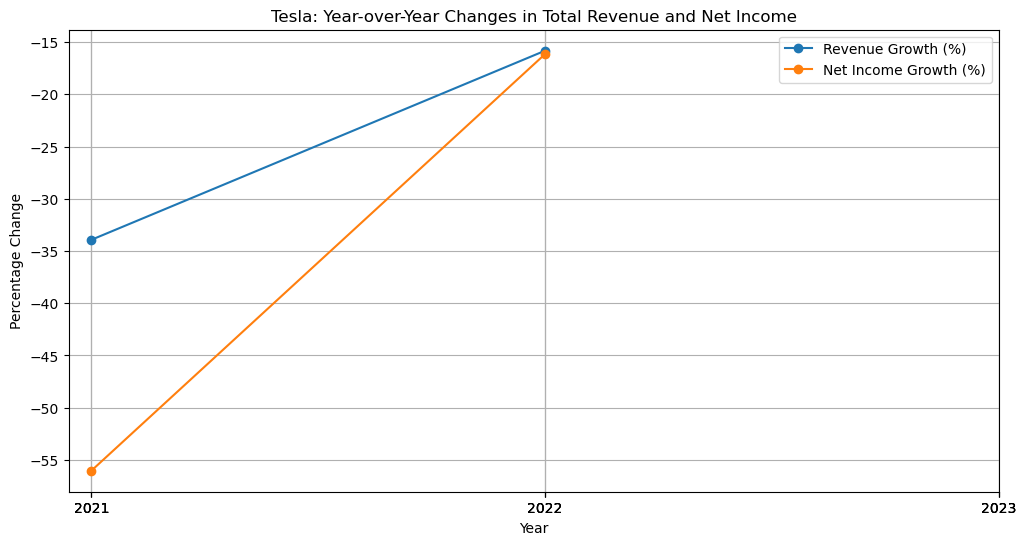

In [46]:
Tesla_df = data[data['Company'] == 'Tesla']

# Plotting the year-over-year changes for Total Revenue and Net Income
plt.figure(figsize=(12, 6))
plt.plot(Tesla_df['Year'], Tesla_df['Revenue Growth (%)'], marker='o', label='Revenue Growth (%)')
plt.plot(Tesla_df['Year'], Tesla_df['Net Income Growth (%)'], marker='o', label='Net Income Growth (%)')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Tesla: Year-over-Year Changes in Total Revenue and Net Income')
plt.legend()
plt.grid(True)
plt.xticks(data['Year'])
plt.show()

### Approach 2 Calculating Year-by-Year growth rates for Total Assets, Total Liabilities and Cash flow from Operations Activities

In [8]:
data['Assets Growth (%)'] = data.groupby('Company')['Total Assets'].pct_change() * 100
data['Liabilities Growth (%)'] = data.groupby('Company')['Total Liabilities'].pct_change() * 100
data['Cash Flow from Operations Growth(%)'] = data.groupby('Company')['Cash Flow from Operating Activities'].pct_change() * 100

In [9]:
data

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow from Operations Growth(%)
0,2023,211915,72361,411976,205753,87582,Microsoft,0.000000,0.000000,NaN,NaN,NaN
1,2022,198270,72738,364840,198298,89035,Microsoft,-6.438902,0.520999,-11.441443,-3.623276,1.659017
2,2021,168088,61271,333779,191791,76740,Microsoft,-15.222676,-15.764800,-8.513595,-3.281425,-13.809176
3,2023,96773,14974,106618,43009,13256,Tesla,0.000000,0.000000,NaN,NaN,NaN
4,2022,81462,12556,82338,36440,14724,Tesla,-15.821562,-16.147990,-22.772890,-15.273547,11.074231
5,2021,53821,5519,62131,30548,11497,Tesla,-33.931158,-56.044919,-24.541524,-16.169045,-21.916599
6,2023,383285,96995,352583,290437,110543,Apple,0.000000,0.000000,NaN,NaN,NaN
7,2022,394328,99803,352755,302083,122151,Apple,2.881146,2.894995,0.048783,4.009820,10.500891
8,2021,365817,94680,351002,287912,104038,Apple,-7.230275,-5.133112,-0.496945,-4.691095,-14.828368


In [10]:
data.fillna(0, inplace=True)

In [11]:
data

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow from Operations Growth(%)
0,2023,211915,72361,411976,205753,87582,Microsoft,0.000000,0.000000,0.000000,0.000000,0.000000
1,2022,198270,72738,364840,198298,89035,Microsoft,-6.438902,0.520999,-11.441443,-3.623276,1.659017
2,2021,168088,61271,333779,191791,76740,Microsoft,-15.222676,-15.764800,-8.513595,-3.281425,-13.809176
3,2023,96773,14974,106618,43009,13256,Tesla,0.000000,0.000000,0.000000,0.000000,0.000000
4,2022,81462,12556,82338,36440,14724,Tesla,-15.821562,-16.147990,-22.772890,-15.273547,11.074231
5,2021,53821,5519,62131,30548,11497,Tesla,-33.931158,-56.044919,-24.541524,-16.169045,-21.916599
6,2023,383285,96995,352583,290437,110543,Apple,0.000000,0.000000,0.000000,0.000000,0.000000
7,2022,394328,99803,352755,302083,122151,Apple,2.881146,2.894995,0.048783,4.009820,10.500891
8,2021,365817,94680,351002,287912,104038,Apple,-7.230275,-5.133112,-0.496945,-4.691095,-14.828368


In [12]:
data.to_csv('final_data_report.csv')

In [13]:
summary = data.groupby('Company').agg({
    'Revenue Growth (%)': 'mean',
    'Net Income Growth (%)': 'mean',
    'Assets Growth (%)' : 'mean',
    'Liabilities Growth (%)' : 'mean',
    'Cash Flow from Operations Growth(%)' :'mean'    
}).reset_index()

In [14]:
print('Year-By-Year Average Growth Rates(%) :-')
print('             OR')
print("Overall Growth/Fall rate for Apple, Microsoft and Tesla from Fiscal Year 2021 - 2023")
summary

Year-By-Year Average Growth Rates(%) :-
             OR
Overall Growth/Fall rate for Apple, Microsoft and Tesla from Fiscal Year 2021 - 2023


,Company,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow from Operations Growth(%)
0,Apple,-1.449710,-0.746039,-0.149388,-0.227092,-1.442492
1,Microsoft,-7.220526,-5.081267,-6.651679,-2.301567,-4.050053
2,Tesla,-16.584240,-24.064303,-15.771471,-10.480864,-3.614123


In [15]:
summary.to_csv('Summary_final_report.csv')